# 1. 퍼셉트론 : 가장 간단한 신경망
- 뉴런을 본 따 만들어 입력, 출력이 있고 신호는 입력->출력 방향으로 흐름
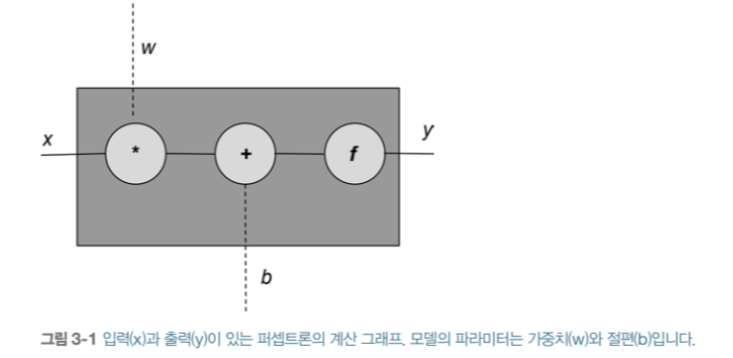
- 가중치와 절편은 데이터에서 학습됨
- 활성화 함수는 신경망과 타깃 출력을 기반으로 설계자의 직관에 따라 결정됨
- y = f(wx + b)
- f의 활성화 함수는 비선형 함수, wx+b는 선형 함수(아핀변환)
- 퍼셉트론은 선형함수와 비선형 함수의 조합

In [ ]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
  """ 퍼셉트론은 하나의 선형 층입니다 """
  def __init__(self, input_dim):
    """
    매개변수 :
      input_dim (int) : 입력 특성의 크기
    """

    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1) # torch.nn 모듈 아래 가중치와 절편에 필요한 부가 작업 수행

  def forward(self, x_in):
    """ 퍼셉트론의 정방향 계산

    매개변수 :
      x_in (torch.Tensor): 입력 데이터 텐서
        x_in.shape는 (batch, num_features)입니다.

    반환값 :
      결과 텐서 : tensor.shape는 (batch,) 입니다.
    """
    return torch.sigmoid(self.fc1(x_in)).squeeze()

# 2. 활성화 함수
- 비선형 함수, 신경망에서 데이터의 복잡한 관계 감지


## 1) 시그모이드
- 임의의 실수값을 받아 0과 1 사이의 범위로 압축
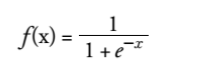
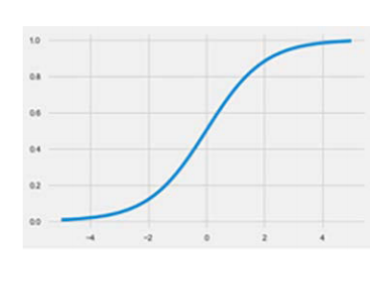


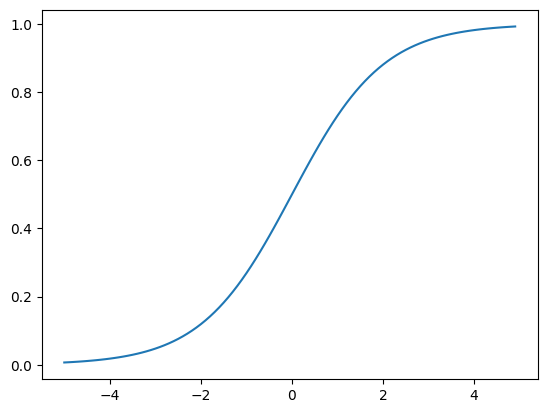

In [ ]:
import torch
import matplotlib.pyplot as plt

# torch.range 대신 torch.arange 사용
x = torch.arange(-5., 5., 0.1)

# 시그모이드 함수 적용
y = torch.sigmoid(x)

# x와 y를 각각 numpy 배열로 변환 후 플롯 생성
plt.plot(x.numpy(), y.numpy())
plt.show()

- 입력 범위 대부분에서 빠르게 포화됨 (극단적인 출력 생성)
- 그레디언트 소실 문제: 그레디언트가 0
- 그레디언트 폭주 문제: 부동소스 오버플로우가 됨
- -> 시그모이드 활성화 함수 거의 출력층에서만 사용 (확률 압축)

## 2) 하이퍼볼릭 탄젠트
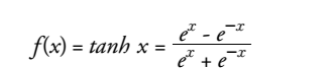
- 시그모이드 함수의 선형 변환
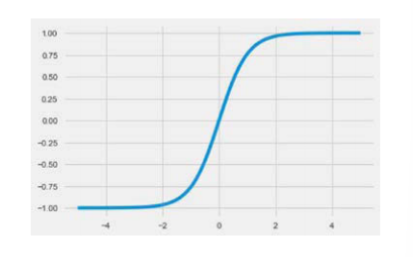
- 전범위의 실수값을 [-1, +1] 로 바꿈

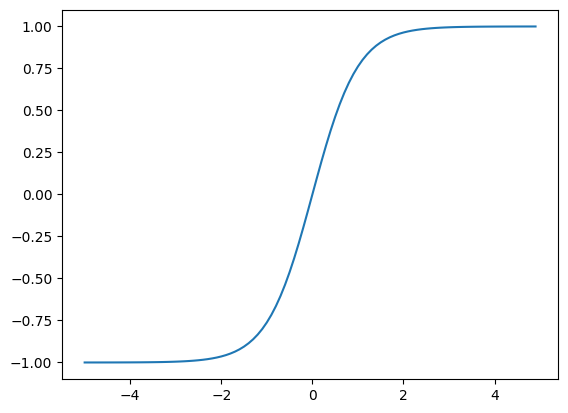

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

## 3) 렐루
- 가장 중요한 활성화 함수
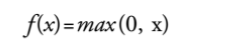
- 음숫값을 0으로 자르는 것
- 음수를 제거해서 그레디언트 소실 문제 도움됨
- 죽은 렐루 문제 : 시간이 지나서 신경망 특정 출력이 0이되면 다시 돌아오지 않는 문제
- -> 보완 : 리키렐루 PreLU 개발

### 3-1) PReLU
- 누수 파라미터 a는 학습되는 파라미터
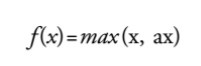
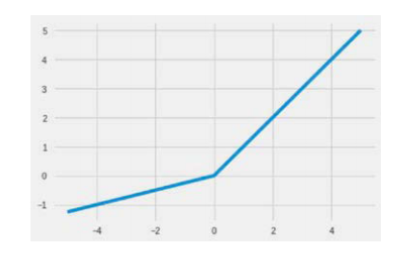

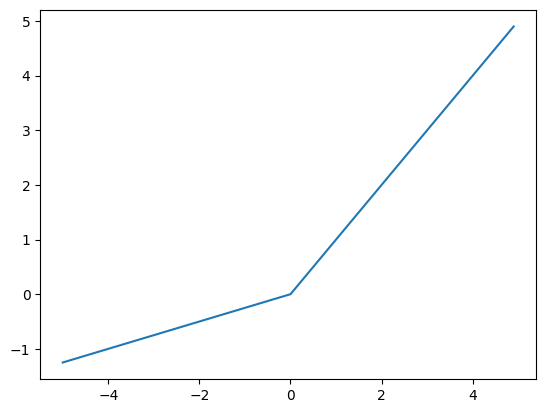

In [ ]:
import torch
import matplotlib.pyplot as plt

# x 텐서 생성 (requires_grad=True로 설정된 경우)
x = torch.arange(-5., 5., 0.1, requires_grad=True)

# 예를 들어 PReLU 활성화 함수 적용 (PReLU는 Parametric ReLU로, 비선형 활성화 함수 중 하나)
prelu = torch.nn.PReLU()
y = prelu(x)

# 텐서에서 그래프 분리 후 numpy 배열로 변환하여 플롯 생성
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

## 4) 소프트맥스
- 신경망 유닛의 출력을 0과 1로 압축
- 모든 출력의 합으로 각 출력을 나누어 k의 클래스에 대한 이산 확률 분포를 만듦
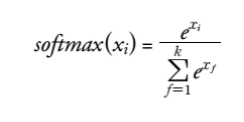
- 소프트맥스의 출력의 합은 1
- 분류 작업의 출력 해석시 유용 (이진분류 - 시그모이드 사용, 다중분류 - 소프트맥스 사용)
- 범주형 크로스 엔트로피와 함께 사용 (확률 기반의 목적 함수)

In [ ]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1,3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[1.1729, 0.2512, 0.4471]])
tensor([[0.5314, 0.2114, 0.2572]])
tensor([1.0000])


# 3. 손실 함수
-

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd /content/drive/MyDrive/NLP Study/NLP_Study

/content/drive/MyDrive/NLP Study/NLP_Study


In [12]:
!git config --global user.email 'yeojin.r.kim@gmail.com'
!git config --global user.name 'YeojinKim03'

In [13]:
!git add --all

In [ ]:
!git commit -m "ADD : Upload Summary Notes  "